In [1]:
import sys
import os
import subprocess
from math import *
import numpy as np
from datetime import *
from pylab import *
import matplotlib as mpl
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
from astropy.table import Table, Column 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
import scipy.misc as scimisc
import random
from datetime import datetime
import json

import warnings
warnings.filterwarnings('ignore')

In [2]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical

In [70]:
def vgg6(input_shape=(128, 128, 3)):


    model = tf.keras.models.Sequential(name='VGG6')

    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=input_shape, name='conv1'))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', name='conv2'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', name='conv3'))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', name='conv4'))
    model.add(tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_2'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(4, 4)))
    model.add(tf.keras.layers.Dropout(0.25))
    
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', name='conv5'))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', name='conv6'))
    model.add(tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_3'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(4, 4)))

    ## Fully connected layers
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(256, activation='relu', name='fc_2'))

       
    model.add(tf.keras.layers.Dense(128, activation='relu', name='fc_3'))
    
    model.add(tf.keras.layers.Dense(64, activation='relu', name='fc_4'))

    model.add(tf.keras.layers.Dense(8, activation='relu', name='fc_5'))
    # output layer
    model.add(tf.keras.layers.Dense(2, activation='softmax'))

    return model

def esn_shuffle(array, seed=0):
        np.random.seed(seed)
        np.random.shuffle(array)
        return array

class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NpEncoder, self).default(obj)


In [4]:
# os.environ["CUDA_VISIBLE_DEVICES"]="1"

# from tensorflow.python.client import device_lib

# device_lib.list_local_devices()

In [117]:
ckpt_dir = 'U0_model05_binary_ckpt/'

with open(ckpt_dir+"evalDict.json") as json_file:
        evalDict = json.load(json_file)

df =  pd.DataFrame.from_dict(evalDict).T   

df.tail()

,loss,accuracy,val_loss,val_accuracy,batchNo,batchFile
995,0.148452,0.9405,0.299878,0.895405,34,128x128_train_aug_35.npz
996,0.147784,0.94095,0.327405,0.887309,36,128x128_train_aug_37.npz
997,0.144302,0.9403,0.308421,0.894092,49,128x128_train_aug_50.npz
998,0.142556,0.94245,0.299854,0.894967,18,128x128_train_aug_19.npz
999,0.140259,0.94235,0.314846,0.887746,10,128x128_train_aug_11.npz


In [118]:
df = df[df.columns[:-1]].rolling(window=5).mean()

df = df.iloc[:700]

Text(0, 0.5, 'Accuracy')

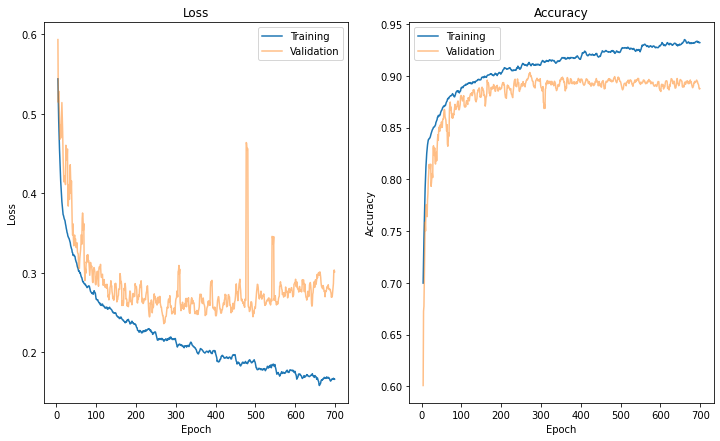

In [119]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7))

epochs = np.arange(len(df))

ax[0].plot(epochs, df.loss.values, label='Training')
ax[0].plot(epochs, df.val_loss, label='Validation', alpha=0.5)
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
# ax[0].set_ylim(8, 30)

ax[1].plot(epochs, df.accuracy.values, label='Training')
ax[1].plot(epochs, df.val_accuracy, label='Validation', alpha=0.5)
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
# ax[1].set_ylim(0, 8)

In [75]:
ckpt_dir = 'U0_model04_ckpt/'

with open(ckpt_dir+"evalDict.json") as json_file:
        evalDict = json.load(json_file)

df =  pd.DataFrame.from_dict(evalDict).T   

df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,batchNo,batchFile
2995,0.0199711,0.0199711,0.106184,0.0310835,0.0310835,0.120538,42,128x128_train_aug_43.npz
2996,0.0193651,0.0193651,0.104492,0.0306282,0.0306282,0.118639,39,128x128_train_aug_40.npz
2997,0.0196248,0.0196248,0.104885,0.029421,0.029421,0.118117,2,128x128_train_aug_03.npz
2998,0.0200852,0.0200852,0.106909,0.0371162,0.0371162,0.13553,29,128x128_train_aug_30.npz
2999,0.0202493,0.0202493,0.106397,0.0301734,0.0301734,0.120595,7,128x128_train_aug_08.npz


Text(0, 0.5, 'Mean Absolute Error')

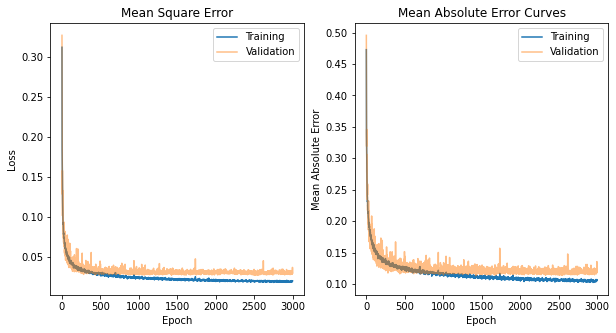

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

epochs = np.arange(len(df))

ax[0].plot(epochs, df.mse.values, label='Training')
ax[0].plot(epochs, df.val_mse, label='Validation', alpha=0.5)
ax[0].set_title('Mean Square Error')
ax[0].legend()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
# ax[0].set_ylim(8, 30)

ax[1].plot(epochs, df.mae.values, label='Training')
ax[1].plot(epochs, df.val_mae, label='Validation', alpha=0.5)
ax[1].set_title('Mean Absolute Error Curves')
ax[1].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Mean Absolute Error')
# ax[1].set_ylim(0, 8)

In [64]:
def esn_shuffle(array, seed=None):
        if seed is not None:
            np.random.seed(seed)
        np.random.shuffle(array)
        return array

In [65]:
seq = iaa.Sequential([
    iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 0.1))),
    iaa.GammaContrast(gamma=(0.97,1.03)),
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 3), per_channel=0.5),
    iaa.Add((-5, 5), per_channel=0.5),
    iaa.Multiply((0.8, 1.2), per_channel=0.5),
    iaa.Sometimes(0.1, iaa.Grayscale(alpha=(0.0, 1.0))),
    iaa.Sometimes(0.50, iaa.Grayscale(alpha=1.)),
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5),
    iaa.Affine(
        rotate=(0, 359),
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.15, 0.15), "y": (-0.15, 0.15)}, 
        mode=ia.ALL, cval=(0, 255))
    ], random_order=True)


seqGray = iaa.Sequential([
    iaa.GammaContrast(gamma=(0.97,1.03)),
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5),
    iaa.Affine(
        rotate=(0, 359),
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.15, 0.15), "y": (-0.15, 0.15)}, 
        mode=ia.ALL, cval=(255, 255))
    ], random_order=True)

In [79]:
%%time 

data = np.load('samples_binary/RGB_128x128_test_000.npz')
images_RGB = data['images'].astype(np.uint8)
labels_RGB = data['labels'] 
pgcIDs_RGB = data['pgcIDs']
N = images_RGB.shape[0]
filter_RGB = np.chararray(N)
filter_RGB[:] = 'c'
data.close() 
del data


data = np.load('samples_binary/g_128x128_test_000.npz')
images_g = data['images'].astype(np.uint8)
labels_g = data['labels'] 
pgcIDs_g = data['pgcIDs']
N = images_g.shape[0]
filter_g = np.chararray(N)
filter_g[:] = 'g'
data.close() 
del data

data = np.load('samples_binary/r_128x128_test_000.npz')
images_r = data['images'].astype(np.uint8)
labels_r = data['labels'] 
pgcIDs_r = data['pgcIDs']
N = images_r.shape[0]
filter_r = np.chararray(N)
filter_r[:] = 'r'
data.close() 
del data

data = np.load('samples_binary/i_128x128_test_000.npz')
images_i = data['images'].astype(np.uint8)
labels_i = data['labels'] 
pgcIDs_i = data['pgcIDs']
N = images_i.shape[0]
filter_i = np.chararray(N)
filter_i[:] = 'i'
data.close() 
del data

images_gri = np.concatenate((images_g, images_r, images_i))
labels_gri = np.concatenate((labels_g, labels_r, labels_i))
pgcIDs_gri = np.concatenate((pgcIDs_g, pgcIDs_r, pgcIDs_i))
filter_gri = np.concatenate((filter_g, filter_r, filter_i))

N_RGB = len(labels_RGB)
N_gri = len(labels_gri)



indx = esn_shuffle(np.arange(N_gri))
images_aug = seqGray(images=images_gri[indx][:N_RGB,:,:,:])
labels_aug = labels_gri[indx][:N_RGB]
pgcIDs_aug = pgcIDs_gri[indx][:N_RGB]
filter_aug = filter_gri[indx][:N_RGB]

n = len(images_aug)
p = int(n/2)
images_aug[:p] = 255 - images_aug[:p]

images_aug = np.concatenate((seq(images=images_RGB),images_aug))
labels_aug = np.concatenate((labels_RGB,labels_aug))
pgcIDs_aug = np.concatenate((pgcIDs_RGB,pgcIDs_aug))
filter_aug = np.concatenate((filter_RGB,filter_aug))

indx = np.arange(len(images_aug))
indx = esn_shuffle(indx)
images_test_aug = images_aug[indx]
labels_test_aug = labels_aug[indx]
pgcIDs_test_aug = pgcIDs_aug[indx]
filter_test_aug = filter_aug[indx]

CPU times: user 13.8 s, sys: 2.62 s, total: 16.4 s
Wall time: 12.5 s


In [80]:
images_test_aug.shape

(4570, 128, 128, 3)

In [81]:
vgg_model = vgg6()
vgg_model.load_weights(ckpt_dir+"200.ckpt")

vgg_model.summary()

Model: "VGG6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 126, 126, 128)     3584      
_________________________________________________________________
conv2 (Conv2D)               (None, 124, 124, 128)     147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 62, 62, 128)       0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 62, 62, 128)       0         
_________________________________________________________________
conv3 (Conv2D)               (None, 60, 60, 256)       295168    
_________________________________________________________________
conv4 (Conv2D)               (None, 58, 58, 256)       590080    
_________________________________________________________________
bn_2 (BatchNormalization)    (None, 58, 58, 256)       1024   

In [98]:
N = 50
labels_test_aug_predict[N][0]+labels_test_aug_predict[N][1]

1.0

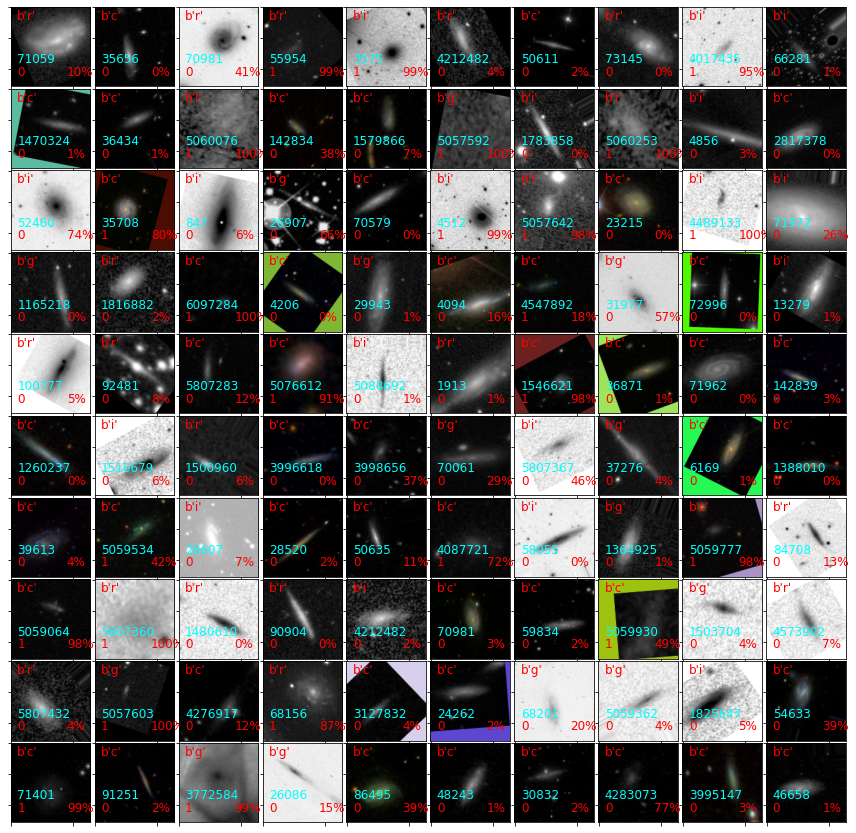

In [100]:
with tf.device('/gpu:1'):  
    labels_test_aug_predict = vgg_model.predict(images_test_aug)
    
    n = 10
    m = 10

    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15,15)) 

    t = 0 
    for i in range(n):
        for j in range(m):

            ax = axes[i][j]
            ax.imshow(images_test_aug[t,:,:])

            plt.setp(ax.get_xticklabels(), visible=False)
            plt.setp(ax.get_yticklabels(), visible=False)

            ax.text(10, 110, labels_test_aug[t], color='red', fontsize=12)
            ax.text(85, 110, "%d"%(np.round(labels_test_aug_predict[t][1]*100))+'%', color='red', fontsize=12)
            ax.text(10, 20, filter_test_aug[t], color='red', fontsize=12)
            ax.text(10, 90, pgcIDs_test_aug[t], color='cyan', fontsize=12)

            t+=1

    plt.subplots_adjust(hspace=0.03, wspace=0.03)

In [77]:
# with tf.device('/gpu:0'):
with tf.device('/gpu:1'):    
    vgg_model = vgg6()
    vgg_model.load_weights(ckpt_dir+"200.ckpt")

    inc_p = vgg_model.predict(images_test_aug)
    inc_m = labels_test_aug

    N = images_test_aug.shape[0]
    inc_p = inc_p.reshape(N)
    inc_p = 0.5*(inc_p+1.)*45.+45.


    fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,5)) 
    
    
    d = inc_m-inc_p
    
    ix = ((d<12)&(d>-12))

    m, b = np.polyfit(inc_m[ix], d[ix], 1)
    x = np.linspace(50,90,20)
    y  = m*x+b

    ax[0].plot(inc_m, d, 'b.', alpha=0.5)
    ax[0].plot([50,90],[0,0], 'k:')
    ax[0].plot(x, y, 'r-')
    ax[0].set_xlim(48,92)
    ax[0].set_ylim(-30 ,30)
    ax[0].set_title('Raw Prediction', fontsize=16)
    ax[0].set_xlabel(r'$i_m$'+'  (measured inclination)', fontsize=14)
    ax[0].set_ylabel(r'$\Delta i = i_m-i_p$', fontsize=14)

    print("Raw RMS: ", np.sqrt(np.mean((d)**2)))

    inc_p2 = (inc_p+b)/(1.-m)
#     inc_p2[(inc_p2>90)] = 90

    d_ = inc_m-inc_p2
    ax[1].plot(inc_m, d_, 'g.')
    ax[1].plot([50,90],[0,0], 'k:')
    ax[1].set_xlim(48,92)
    ax[1].set_ylim(-30,30)

    print("Adjusted RMS: ", np.sqrt(np.mean((d_)**2)))
    ax[1].set_title('Adjusted Prediction', fontsize=16)
    ax[1].set_xlabel(r'$i_m$'+'  (measured inclination)', fontsize=14)
    ax[1].set_ylabel(r'$\Delta i = i_m-i_{pc}$', fontsize=14)

    plt.subplots_adjust( wspace=0.3)

KeyboardInterrupt: 

In [12]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7280612547223002801,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17485164555146848957
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13812204364036381833
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:XLA_GPU:1"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 468474491631279919
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2236088320
 locality {
   bus_id: 1
   links {
     link {
       device_id: 1
       type: "StreamExecutor"
       strength: 1
     }
   }
 }
 incarnation: 15590788565579743084
 physical_device_desc: "device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:17:00.0, compute capability: 7.0",
 n